In [1]:
# https://github.com/jukyellow/algoTrade/blob/master/ch06/6.2%20KNN_ml%20st.ipynb
# KNN(K-nearest neighbor) : 분류를 함에 있어서 어떠한 분포도 가정하지 않기 때문에, 비모수적방법(non-parametric method) 에 속한다.
# Data : S&P 500 지수를 추종하는 ETF 상품?인 SPY를 사용

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

from pandas_datareader import data as pdr #Yahoo Finance으로부터 데이터를 불러오기 위한 패키지

In [20]:
df = pdr.get_data_yahoo('SPY','2017-01-01','2020-12-01')

In [21]:
df = df.dropna()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,209.785889
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,211.033981
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,210.866318
2017-01-06,227.750000,225.899994,226.529999,227.210007,71559900.0,211.620728
2017-01-09,227.070007,226.419998,226.910004,226.460007,46939700.0,210.922211


In [22]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-24,363.809998,359.290009,360.209991,363.220001,62415900.0,363.220001
2020-11-25,363.160004,361.480011,363.130005,362.660004,45330900.0,362.660004
2020-11-27,364.179993,362.579987,363.839996,363.670013,28514100.0,363.670013
2020-11-30,363.119995,359.170013,362.829987,362.059998,83872700.0,362.059998
2020-12-01,367.679993,364.929993,365.570007,366.019989,74505000.0,366.019989


In [25]:
tmp_df = df[['Open','High','Low','Close']].copy()
tmp_df.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005
2017-01-04,225.619995,226.750000,225.610001,226.580002
2017-01-05,226.270004,226.580002,225.479996,226.399994
2017-01-06,226.529999,227.750000,225.899994,227.210007
2017-01-09,226.910004,227.070007,226.419998,226.460007


In [26]:
tmp_df['Open-Close'] = tmp_df['Open'] - tmp_df['Close']
tmp_df['High-Low'] = tmp_df['High'] - tmp_df['Low']
tmp_df = tmp_df.dropna()
X = tmp_df[['Open-Close','High-Low']]
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Open'].shift(-1), 1, -1)

print(X.head())
print(Y)

            Open-Close  High-Low
Date                            
2017-01-03   -0.200012  1.949997
2017-01-04   -0.960007  1.139999
2017-01-05   -0.129990  1.100006
2017-01-06   -0.680008  1.850006
2017-01-09    0.449997  0.650009
[ 1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1
  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1 -1
  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1
 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1
 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1
 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1
 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1
  1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1

In [27]:
x_min, x_max = X['Open-Close'].min() - .5, X['Open-Close'].max() + .5
y_min, y_max = X['High-Low'].min() - .5, X['High-Low'].max() + .5

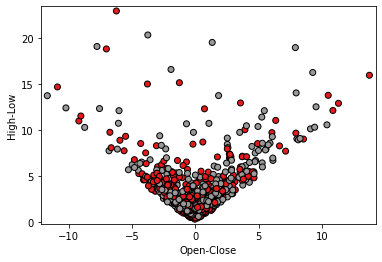

In [28]:
plt.scatter(X['Open-Close'], X['High-Low'], c=Y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Open-Close')
plt.ylabel('High-Low')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [29]:
# 학습 데이터와 테스트 데이터를 분할한다
split_ratio = 0.7
split = int(split_ratio* len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [30]:
#for 반복문을 통해 1~15까지의 k값을 가진 모델을 만들어 본다
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append((prediction==Y_test).mean())

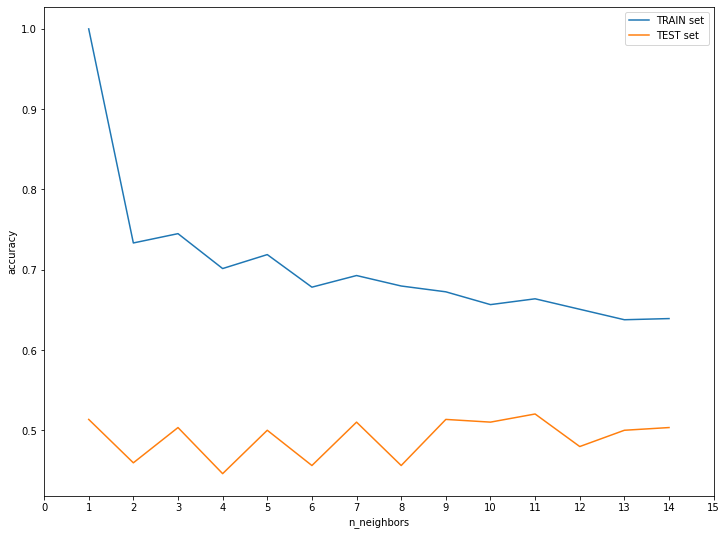

In [31]:
# 위에서 만든 결과를 그래프로 만들어 준다
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [33]:
knn = KNeighborsClassifier(n_neighbors = 7) # 7일때가 가장 테스트 성능이 높았음!

knn.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('훈련 정확도 : %.2f' % accuracy_train)
print('테스트 정확도 : %.2f' % accuracy_test)

훈련 정확도 : 0.69
테스트 정확도 : 0.51


# KNN 모델을 활용한 간단한 투자전략 만들기
* KNN 모델
1 이라고 예측하면 매수,
-1 이라고 예측하면 공매도

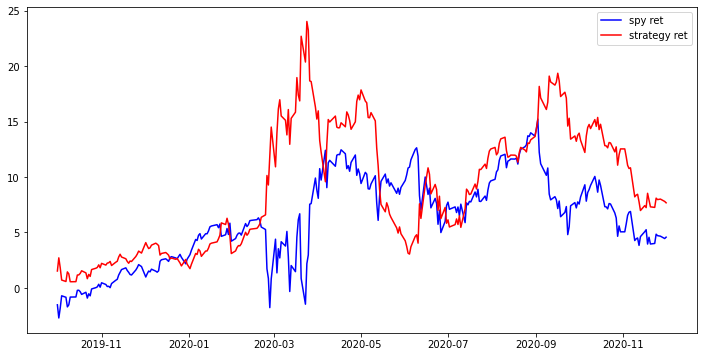

In [34]:
tmp_df['Predicted_Signal'] = knn.predict(X)

tmp_df['SPY_ret'] = np.log(tmp_df['Close'] / tmp_df['Open'])
cum_spy_ret = tmp_df[split:]['SPY_ret'].cumsum() * 100

tmp_df['strategy_ret'] = tmp_df['SPY_ret'] * tmp_df['Predicted_Signal'].shift(1)
cum_st_ret = tmp_df[split:]['strategy_ret'].cumsum() * 100

plt.figure(figsize=(12,6))
plt.plot(cum_spy_ret, color='b',label='spy ret')
plt.plot(cum_st_ret , color='r', label='strategy ret')
plt.legend()
plt.show()

# 바이앤홀드 전략을 구사했을 경우의, 시그널에 따라 매매했을 경우의 수익률 그래프...

In [35]:
print('TOTAL : ',tmp_df['Predicted_Signal'].count())
print('UP predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == 1,['Predicted_Signal']].count()[0])
print('DOWN predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == -1,['Predicted_Signal']].count()[0])

TOTAL :  986
UP predict :  526
DOWN predict :  460


In [17]:
test = tmp_df[split:]['SPY_ret']
test.cumsum()

Date
2018-04-02   -0.019538
2018-04-03   -0.012226
2018-04-04    0.013953
2018-04-05    0.014292
2018-04-06    0.000146
                ...   
2020-11-24    0.026353
2020-11-25    0.025058
2020-11-27    0.024591
2020-11-30    0.022466
2020-12-01    0.023697
Name: SPY_ret, Length: 674, dtype: float64

In [18]:
# 샤프지수
std = cum_st_ret.std()
sharpe = (cum_st_ret - cum_spy_ret) / std
sharpe = sharpe.mean()
print('Sharpe ratio : %.2f' % sharpe)

# 추세나, 계절성이 있다면 KNN은 잘 포착하지 못함, 사전에 추세나 계절성을 분해한다면 더 좋을 결과가 나올것.

Sharpe ratio : 1.44


In [19]:
cum_spy_ret
#참고: https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/ 참고

Date
2018-04-02   -1.953828
2018-04-03   -1.222552
2018-04-04    1.395267
2018-04-05    1.429163
2018-04-06    0.014600
                ...   
2020-11-24    2.635337
2020-11-25    2.505823
2020-11-27    2.459093
2020-11-30    2.246650
2020-12-01    2.369665
Name: SPY_ret, Length: 674, dtype: float64